In [1]:
import pandas_datareader.data as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import the stocks of S&P 500 technology sector
SPTech = pd.read_csv('sectors_technology.csv')

In [3]:
SPTech.head()

,Symbol,Name,Market Cap,P/E ttm,EPS ttm,Net Income(a),Beta,Dividend(a),Div Yield
0,AAPL,Apple Inc,1.241626e+12,23.63,11.85,5.525600e+10,1.24,3.08,1.10%
1,ACN,Accenture Plc,1.341904e+11,27.81,7.36,4.779110e+09,1.04,3.20,1.52%
2,ADBE,Adobe Systems Inc,1.585891e+11,50.33,6.51,2.951460e+09,1.11,0.00,0.00%
3,ADI,Analog Devices,4.412994e+10,23.09,5.14,1.363010e+09,1.41,2.16,1.80%
4,ADP,Automatic Data Procs,7.403030e+10,30.19,5.59,2.292800e+09,0.88,3.64,2.13%


In [4]:
# take Symbol as index
SPTech = SPTech.set_index('Symbol')

In [5]:
# sort the data by ascending
SPTech = SPTech.sort_values(by=['P/E ttm'])[:10]

In [6]:
SPTech

,Name,Market Cap,P/E ttm,EPS ttm,Net Income(a),Beta,Dividend(a),Div Yield
Symbol,,,,,,,,
DXC,Dxc Technology Company,9.620405e+09,5.01,7.54,1.257000e+09,2.03,0.84,2.24%
ADS,Alliance Data Systems Corp,5.125571e+09,5.79,19.02,9.631000e+08,1.65,2.52,2.26%
HPE,Hewlett Packard Enterprise Comp,2.014379e+10,8.84,1.78,1.049000e+09,1.56,0.48,3.08%
XRX,Xerox Corp,8.074622e+09,8.99,4.12,3.610000e+08,1.83,1.00,2.68%
HPQ,Hp Inc,2.987754e+10,9.10,2.23,3.152000e+09,1.44,0.70,3.43%
IBM,International Business Machines,1.200835e+11,10.37,12.97,8.728000e+09,1.34,6.48,4.78%
INTC,Intel Corp,2.564325e+11,12.46,4.65,2.105300e+10,0.91,1.26,2.14%
STX,Seagate Tech Ord Shs,1.566283e+10,14.15,4.13,2.012000e+09,1.62,2.52,4.23%
WU,Western Union Company,1.150019e+10,14.93,1.82,8.519000e+08,0.81,0.80,2.92%


In [7]:
# HPE started from 2015, however we hope the data at least 10 years, so HPE is eliminated.
SPTech = SPTech.drop('HPE')

In [8]:
# create the stock list of the ten stocks above
stock_lists = SPTech.index

In [9]:
stock_lists

Index(['DXC', 'ADS', 'XRX', 'HPQ', 'IBM', 'INTC', 'STX', 'WU', 'MU'], dtype='object', name='Symbol')

In [10]:
# download the stocks data from yahoo finance
data = web.DataReader(stock_lists,data_source='yahoo',start='01/01/2009')['Adj Close']

In [11]:
data.sort_index(inplace=True)

In [12]:
# (P1-P0) / P0
returns = data.pct_change()

In [13]:
# calculate the mean of daily return
mean_daily_returns = returns.mean()
# calculate the annual return
annualised_return = round(mean_daily_returns * 252,2)

In [14]:
# calculate the standard deviation of each stock
return_stdev = returns.std()
# calculate the annual standard deviation
annualised_stdev = round(return_stdev * np.sqrt(252),2)

In [15]:
# caluculate the sharpe ratio
sharpe_ratio = (annualised_return) / annualised_stdev

In [16]:
sharpe_ratio

Symbols
ADS     0.419355
DXC     0.514286
HPQ     0.343750
IBM     0.450000
INTC    0.730769
MU      0.780000
STX     0.804348
WU      0.444444
XRX     0.363636
dtype: float64

In [17]:
stocks = ['MU', 'STX', 'INTC', 'DXC', 'IBM']

In [18]:
data = web.DataReader(stocks,data_source='yahoo',start='01/01/2009')['Adj Close']
data.sort_index(inplace=True)
returns = data.pct_change()
returns.head()

Symbols,DXC,IBM,INTC,MU,STX
Date,,,,,
2009-01-02,NaN,NaN,NaN,NaN,NaN
2009-01-05,0.012399,-0.006295,-0.019079,0.169014,0.011811
2009-01-06,0.052449,0.027759,0.030852,0.045181,0.124514
2009-01-07,-0.041488,-0.016138,-0.060508,-0.054755,-0.070934
2009-01-08,-0.029031,-0.006948,0.007618,0.039634,0.042830


In [19]:
mean_daily_returns = returns.mean()
# calculate covariance of daily returns
cov_matrix = returns.cov()
mean_daily_returns

Symbols
DXC     0.000712
IBM     0.000357
INTC    0.000752
MU      0.001563
STX     0.001475
dtype: float64

In [20]:
cov_matrix

Symbols,DXC,IBM,INTC,MU,STX
Symbols,,,,,
DXC,0.000500,0.000116,0.000135,0.000246,0.000204
IBM,0.000116,0.000166,0.000102,0.000164,0.000135
INTC,0.000135,0.000102,0.000266,0.000273,0.000212
MU,0.000246,0.000164,0.000273,0.001004,0.000403
STX,0.000204,0.000135,0.000212,0.000403,0.000839


In [21]:
# Monte Carlo simulation
# to run number of runs different randomly generated weights for the individual stocks
# set number of runs of random portfolio weights
num_portfolios = 25000

In [22]:
# set up array to hold results
# create a 3X25000 array filled with zero
# 3:portfolio return, portfolio std, sharp ratio
results = np.zeros((3,num_portfolios))
results

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
for i in range(num_portfolios):
    weights = np.random.random(5) #select random weights for portfolio holdings
    weights /= np.sum(weights) #rebalance weights to sum to 1
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    results[2,i] = (results[0,i]) / results[1,i] #sharp ratio

In [24]:
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe'])
results_frame.head()

,ret,stdev,sharpe
0,0.291132,0.307262,0.947504
1,0.195429,0.231735,0.843331
2,0.276430,0.294242,0.939465
3,0.253549,0.266581,0.951117
4,0.267774,0.291132,0.919770


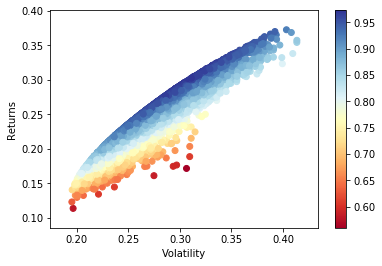

In [25]:
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()

In [26]:
# find out the protfolio with the highest Sharpe Ratio and the lowest standard deviation

In [27]:
# 4+len(stocks)-1:portfolio return, portfolio std, sharp ratio and the weight values for each stock

In [28]:
results = np.zeros((4+len(stocks)-1,num_portfolios))

for i in range(num_portfolios):
    weights = np.array(np.random.random(5))
    weights /= np.sum(weights)
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    results[2,i] = (results[0,i]) / results[1,i]
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

In [29]:
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3],stocks[4]])
results_frame.head()

,ret,stdev,sharpe,MU,STX,INTC,DXC,IBM
0,0.270248,0.281799,0.959008,0.085763,0.154065,0.259673,0.257846,0.242653
1,0.233060,0.250359,0.930905,0.043373,0.310596,0.250262,0.123769,0.272000
2,0.209007,0.234349,0.891864,0.171156,0.372281,0.156309,0.158636,0.141617
3,0.228435,0.259824,0.879193,0.239002,0.354426,0.017105,0.252780,0.136686
4,0.217972,0.249636,0.873159,0.256972,0.300511,0.111496,0.026831,0.304191


In [30]:
# locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]

In [31]:
# locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

In [32]:
# locate positon of portfolio with maximum return
max_return = results_frame.iloc[results_frame['ret'].idxmax()]

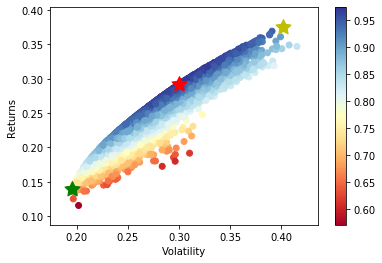

In [46]:
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=250)
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=250)
plt.scatter(max_return[1],max_return[0],marker=(5,1,0),color='y',s=250)

In [34]:
print(max_sharpe_port)

ret       0.291818
stdev     0.299787
sharpe    0.973418
MU        0.110755
STX       0.011351
INTC      0.332180
DXC       0.230270
IBM       0.315445
Name: 23330, dtype: float64


In [35]:
print(min_vol_port)

ret       0.139258
stdev     0.195028
sharpe    0.714041
MU        0.122148
STX       0.575357
INTC      0.258013
DXC       0.002799
IBM       0.041682
Name: 22826, dtype: float64


In [36]:
print(max_return)

ret       0.375946
stdev     0.401948
sharpe    0.935309
MU        0.008292
STX       0.004000
INTC      0.027074
DXC       0.536403
IBM       0.424232
Name: 15856, dtype: float64


In [37]:
cal_return = returns.copy()

In [38]:
numstocks = len(stocks)
MSR_weights = np.array(max_return[3:])
cal_return['Portfolio_MSR'] = returns.mul(MSR_weights, axis = 1).sum(axis=1)

In [39]:
def cumulative_returns_plot(name_list):
    for name in name_list:
        cumulativereturns = ((1+cal_return[name]).cumprod()-1)
        cumulativereturns.plot(label=name)
        plt.legend()
    plt.show()

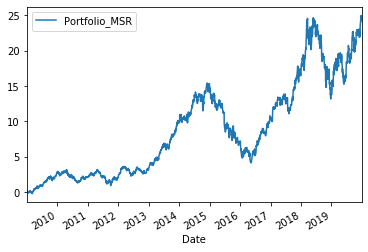

In [40]:
cumulative_returns_plot(['Portfolio_MSR'])

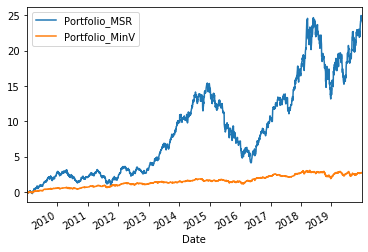

In [41]:
MinV_weights = np.array(min_vol_port[3:])
cal_return['Portfolio_MinV'] = returns.mul(MinV_weights, axis = 1).sum(axis=1)
cumulative_returns_plot(['Portfolio_MSR','Portfolio_MinV'])

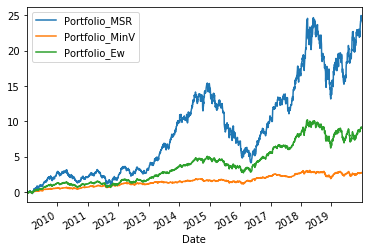

In [42]:
EW_weights = np.repeat(1/numstocks, numstocks)
cal_return['Portfolio_Ew'] = returns.mul(EW_weights, axis = 1).sum(axis=1)
cumulative_returns_plot(['Portfolio_MSR','Portfolio_MinV','Portfolio_Ew'])

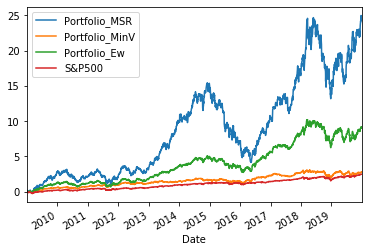

In [43]:
SP500 = web.DataReader('^GSPC',data_source='yahoo',start='01/01/2009')['Adj Close']
SP500.sort_index(inplace=True)
SP500_returns = SP500.pct_change()
cal_return['S&P500'] = SP500_returns
cumulative_returns_plot(['Portfolio_MSR','Portfolio_MinV','Portfolio_Ew','S&P500'])